In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set(style='whitegrid', rc={'figure.figsize' : (10,5)})

C:\Users\Shaetan\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
df = pd.read_csv('B:/Karpov Courses/Stat/Lesson_7/cars.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df['mark'] = df.CarName.apply(lambda x: x.split()[0])

In [5]:
df.drop(labels = 'CarName',
    axis = 'columns',
    inplace = True)
df.drop(labels = 'car_ID',
    axis = 'columns',
    inplace = True)

In [6]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'mark'],
      dtype='object')

In [7]:
df.mark.nunique()

28

In [8]:
df.mark = df.mark.str.lower()


In [9]:
def repl(x,y):
    df.mark.replace(x,y,inplace=True)

In [10]:
repl('maxda', 'mazda')
repl('porsche','porcshce')
repl('toyouta', 'toyota')
repl('vokswagen', 'volkswagen')
repl('vw', 'volkswagen')


In [11]:
cols_to_keep = ['fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'mark', 'price']

In [12]:
df = df[cols_to_keep]

In [192]:
df.corr()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.808139
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,1.000000


In [172]:
round(0.808139, 2)

0.81

In [19]:
df.groupby('mark', as_index=False)\
            .agg({'carlength':'mean'})

,mark,carlength
0,alfa-romero,169.600000
1,audi,183.828571
2,bmw,184.500000
3,buick,195.262500
4,chevrolet,151.933333
5,dodge,160.988889
6,honda,160.769231
7,isuzu,163.775000
8,jaguar,196.966667
9,mazda,170.805882


In [193]:
df.dtypes

fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
mark               object
price             float64
dtype: object

In [195]:
df1 = pd.get_dummies(data=df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype',
 'cylindernumber',  'mark']], drop_first=True)

In [196]:
new = pd.concat([df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype',
 'cylindernumber',  'mark'], axis='columns'), df1], axis=1)

In [197]:
new.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueltype_gas,aspiration_turbo,...,mark_nissan,mark_peugeot,mark_plymouth,mark_porcshce,mark_renault,mark_saab,mark_subaru,mark_toyota,mark_volkswagen,mark_volvo
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
X = sm.add_constant(new.horsepower)  # добавить константу, чтобы был свободный член
model = sm.OLS(new.price, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.48e-48
Time:                        05:45:24   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

In [206]:
results = smf.ols('price ~ wheelbase + carlength+carwidth+curbweight+enginesize+boreratio+\
horsepower+fueltype_gas+aspiration_turbo+mark_nissan+mark_peugeot+mark_plymouth+mark_porcshce\
+mark_renault+mark_saab+mark_subaru+mark_toyota+mark_volkswagen+mark_volvo', new).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     70.18
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           6.04e-74
Time:                        18:02:22   Log-Likelihood:                -1916.7
No. Observations:                 205   AIC:                             3873.
Df Residuals:                     185   BIC:                             3940.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.862e+04   1.22e+04  

In [ ]:
'wheelbase + carlength+carwidth+curbweight+enginesize+boreratio+horsepower+fueltype_gas\
+aspiration_turbo

In [205]:
results = smf.ols('price ~ wheelbase + carlength+carwidth+curbweight+enginesize\
+boreratio+horsepower+fueltype_gas', new).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     115.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           6.40e-70
Time:                        05:57:43   Log-Likelihood:                -1953.9
No. Observations:                 205   AIC:                             3926.
Df Residuals:                     196   BIC:                             3956.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.781e+04   1.33e+04     -2.834   

Text(0, 0.5, 'Price')

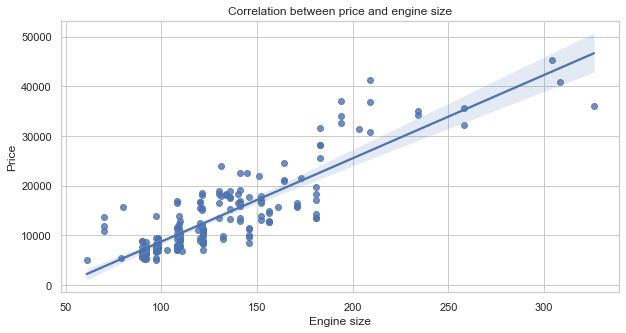

In [212]:
sns.regplot(x = 'enginesize', y = 'price', data = df)
plt.title('Correlation between price and engine size')
plt.xlabel('Engine size')
plt.ylabel('Price')

<AxesSubplot:xlabel='fueltype', ylabel='price'>

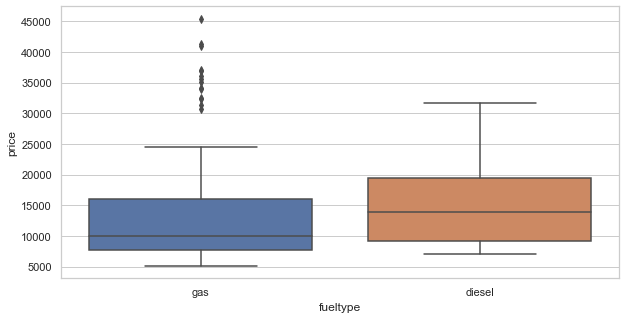

In [216]:
sns.boxplot(x = 'fueltype', y = 'price', data = df)

<AxesSubplot:>

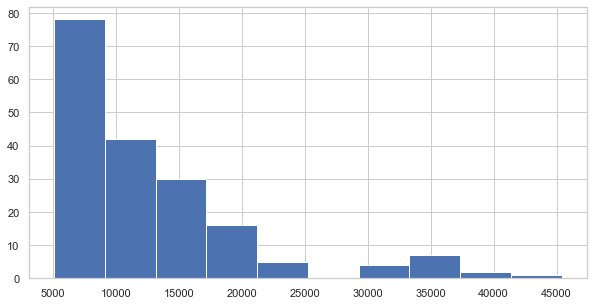

In [222]:
df.query('fueltype =="gas"').price.hist()

<AxesSubplot:>

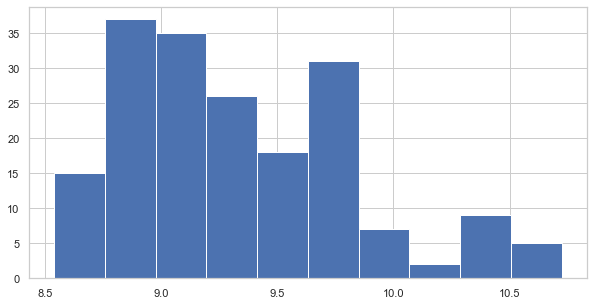

In [221]:
np.log(df.query('fueltype =="gas"').price).hist()

In [219]:
df.query('fueltype =="gas" & price >25000')

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,mark,price
15,gas,std,sedan,rwd,103.5,189.0,66.9,3230,ohc,six,209,3.62,182,bmw,30760.0
16,gas,std,sedan,rwd,103.5,193.8,67.9,3380,ohc,six,209,3.62,182,bmw,41315.0
17,gas,std,sedan,rwd,110.0,197.0,70.9,3505,ohc,six,209,3.62,182,bmw,36880.0
47,gas,std,sedan,rwd,113.0,199.6,69.6,4066,dohc,six,258,3.63,176,jaguar,32250.0
48,gas,std,sedan,rwd,113.0,199.6,69.6,4066,dohc,six,258,3.63,176,jaguar,35550.0
49,gas,std,sedan,rwd,102.0,191.7,70.6,3950,ohcv,twelve,326,3.54,262,jaguar,36000.0
71,gas,std,sedan,rwd,115.6,202.6,71.7,3740,ohcv,eight,234,3.46,155,buick,34184.0
72,gas,std,convertible,rwd,96.6,180.3,70.5,3685,ohcv,eight,234,3.46,155,buick,35056.0
73,gas,std,sedan,rwd,120.9,208.1,71.7,3900,ohcv,eight,308,3.80,184,buick,40960.0
74,gas,std,hardtop,rwd,112.0,199.2,72.0,3715,ohcv,eight,304,3.80,184,buick,45400.0


In [223]:
pg.normality(df.price)

,W,pval,normal
price,0.800665,1.849178e-15,False
